In [51]:
import numpy as np
import pandas as pd
import os
import joblib

## Dataset Preparation

In [52]:
df = pd.DataFrame({"x1":[0, 0, 1, 1], "x2" : [0, 1, 0, 1], "y" : [0, 0, 0, 1]})
print(df)
x = df.drop(columns= "y")
y = df["y"]

   x1  x2  y
0   0   0  0
1   0   1  0
2   1   0  0
3   1   1  1


## Perceptron Implementation

In [86]:
class Perceptron:
    def __init__(self, eta=None, epochs=None):
        if (eta is not None) and (epochs is not None):
            self.eta=eta
            self.epochs = epochs

            self.weights = np.random.rand(3)*1e-4

            print("Initial weights are \n")
            print(self.weights)
        
    def _z_value(self, inputs, weights):
        return np.dot(inputs, weights)
        
    def _activation_func(self, z):
        return np.where(z>=0, 1, 0)
    
    def fit(self, x, y):
        self.x = x
        self.y = y
        
        x_with_bias = np.c_[x, -np.ones((len(x), 1))]
        
        for epoch in range(1, self.epochs+1):
            print("#"*50)
            print(f"\n Epoch {epoch}\n")
            
            z = self._z_value(x_with_bias, self.weights)
            y_hat = self._activation_func(z)
            print(f"Prediction is : is {y_hat}\n")
            
            error = y - y_hat
            print(f"Error : is\n{error}\n")
            
            self.weights = self.weights + self.eta * np.dot(x_with_bias.T, error)
            print(f"Updated weights are  : is\n{self.weights}\n")
        
        self.error = error
        print(f"Total loss is {self.error.sum()}")
    
    def predict(self, x):
        x.append(-1)
        z = np.dot(x, self.weights)
        y_hat = self._activation_func(z)
        return y_hat
    
    @property
    def total_loss(self):
        return self.error.sum()
    
    def save(self, filename, model_dir="model"):
        os.makedirs(model_dir, exist_ok=True)
        file_path = os.path.join(model_dir, filename)
        joblib.dump(self, file_path)
        print(f"Model is save to {file_path}")
        
    def load(self, filename, model_dir="model"):
        """
        method for loading the model with the path of saved model
        """
        file_path = os.path.join(model_dir, filename)
        return joblib.load(file_path)


In [87]:
model = Perceptron(eta=0.1, epochs=10)

Initial weights are 

[4.64692960e-05 3.38545366e-05 9.16860492e-05]


In [88]:
model.fit(x, y)

##################################################

 Epoch 1

Prediction is : is [0 0 0 0]

Error : is
0    0
1    0
2    0
3    1
Name: y, dtype: int64

Updated weights are  : is
[ 0.10004647  0.10003385 -0.09990831]

##################################################

 Epoch 2

Prediction is : is [1 1 1 1]

Error : is
0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64

Updated weights are  : is
[4.64692960e-05 3.38545366e-05 2.00091686e-01]

##################################################

 Epoch 3

Prediction is : is [0 0 0 0]

Error : is
0    0
1    0
2    0
3    1
Name: y, dtype: int64

Updated weights are  : is
[0.10004647 0.10003385 0.10009169]

##################################################

 Epoch 4

Prediction is : is [0 0 0 1]

Error : is
0    0
1    0
2    0
3    0
Name: y, dtype: int64

Updated weights are  : is
[0.10004647 0.10003385 0.10009169]

##################################################

 Epoch 5

Prediction is : is [0 0 0 1]

Error : is
0    0
1    0
2   

In [90]:
model.predict([0, 1])

array(0)

In [91]:
model.total_loss

0

In [57]:
for i in range(2):
    for j in range(2):
        print(f"{i} {j} -> {model.predict([i, j])}")

0 0 -> 0
0 1 -> 0
1 0 -> 0
1 1 -> 1


In [61]:
model.save("perceptron_or_gate")

Model is save to model\perceptron_or_gate


In [71]:
model_loaded = Perceptron().load("perceptron_or_gate")
print(model_loaded.predict([1, 1]))

1


In [58]:
import matplotlib.pyplot as plt 

%matplotlib inline

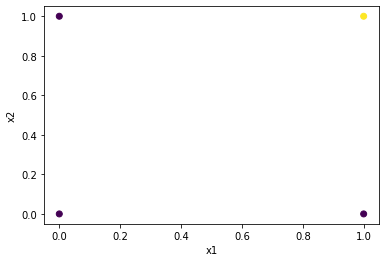

In [59]:
plt.scatter(x["x1"], x["x2"], c=y)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## Drawbacks of Perceptron

<ul>
    <li>From the the above graph we cannot we can observer that we cannot liearly seperate the data.</li>
    <li>So the Perceptron fails.</li>
    <li>For improving these we use multi layer perceptron or Artificial Neural Network (ANN)</li>
</ul>
